In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('US Police shootings in from 2015-222.xlsx')
df

,US Police shootings in from 2015-22,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
1,1,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,2,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7679,7679,NaN,2022-08-23,shot,machete,48,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7680,7680,Geraldo Reyes,2022-08-23,shot,gun,32,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True
7681,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True


In [ ]:
#rename the columns
array = np.array(df)
list = array.tolist()
df.columns = list[0]
df.drop([0],inplace=True,axis=0)
df = df.set_index('id')
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
id,,,,,,,,,,,,,,,,
1,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7679,NaN,2022-08-23,shot,machete,48,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7680,Geraldo Reyes,2022-08-23,shot,gun,32,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True


In [ ]:
#data filtering & data cleaning
df['date'] = pd.to_datetime(df.date)
df_year = df['date'].dt.year
df = df.loc[df_year>=2017]
df = df.dropna(axis=0,how='any',subset=['age','race','gender'])
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
id,,,,,,,,,,,,,,,,
1953,John McLaughlin,2017-01-01,shot,gun,42,M,W,Springfield,OH,False,other,Not fleeing,False,-84.515,39.233,True
1954,Trevon Johnson,2017-01-01,shot,knife,17,M,B,Villa Park,IL,True,other,Not fleeing,False,-87.978,41.856,True
1955,Chad Erik Roberts,2017-01-01,shot,gun,35,M,W,Woodstock,GA,False,attack,Car,False,-84.519,34.101,False
1956,Juan Carlos Cuadra,2017-01-01,shot,gun,23,M,H,Houston,TX,False,attack,Foot,False,-95.428,29.603,True
1957,Mark Guirguis,2017-01-01,shot,NaN,21,M,B,Allen,TX,False,attack,Car,False,-96.664,33.092,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,Robert Marquise Adams,2022-07-16,shot,gun,23,M,B,San Bernardino,CA,False,other,Foot,True,NaN,NaN,True
7601,Christopher W. Hansen,2022-07-22,shot,knife,37,M,W,Bolingbrook,IL,True,other,Not fleeing,False,NaN,NaN,True
7623,Joshua Hippler,2022-07-30,shot,ax,27,M,W,Rochester,MN,False,other,Not fleeing,True,NaN,NaN,True


In [ ]:
#data wranggling
df = df.replace('W','White')
df = df.replace('B','Black')
df = df.replace('H','Hispanic')
df = df.replace('A','Asia')
df = df.replace('N','Native')
df = df.replace('O','Others')

df = df.replace('M','Male')
df = df.replace('F','Female')

In [ ]:
df.to_csv('data_cleaning_uspolice.csv')

In [ ]:
#gender_df
df_gender_count = df.reset_index()
df_gender_pie = df_gender_count.groupby('gender')['id'].count()
df_gender_pie.to_list()
df_gender_pie.index.to_list()

['Female', 'Male']

In [ ]:
df_gender_count = pd.DataFrame({'Gender':['Female','Male'], 'gender_Count':[207,4054]})
df_gender_count

,Gender,gender_Count
0,Female,207
1,Male,4054


In [ ]:
df_gender_count.to_csv('df_gender_count.csv')

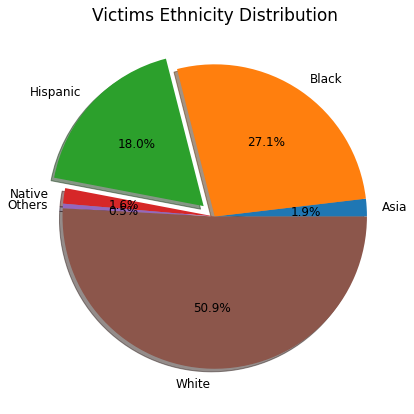

In [ ]:
#ethnicity distribution
import matplotlib.pyplot as plt

df_include_id = df.reset_index()
df_race_pie = df_include_id.groupby('race')['id'].count()

ax = plt.subplot()

df_race_pie.plot.pie(figsize=(7,7),fontsize=12,autopct='%1.1f%%',explode=[0,0,0.1,0,0,0],shadow=True)
#ax.pie(df_race_pie,labels=df_race_pie.index,autopct='%1.2f%%',radius=2.5)
plt.title('Victims Ethnicity Distribution',fontsize=17)
plt.ylabel('')
plt.show()

In [ ]:
#ethnicity_df
df_ethnicity_count = df.reset_index()
df_ethnicity_pie = df_ethnicity_count.groupby('race')['id'].count()
df_ethnicity_pie

race
Asia          80
Black       1155
Hispanic     768
Native        70
Others        21
White       2167
Name: id, dtype: int64

In [ ]:
#ethnicity_df
df_gender_count = pd.DataFrame({'Ethnicity':['Asia','Black','Hispanic','Native','Others','White'], 'ethnicity_Count':[80,1155,768,70,21,2167]})
df_gender_count

,Ethnicity,ethnicity_Count
0,Asia,80
1,Black,1155
2,Hispanic,768
3,Native,70
4,Others,21
5,White,2167


In [ ]:
df_gender_count.to_csv('df_ethnicity_count.csv')

In [ ]:
#Age_df
df_age_specific_count = df.reset_index()
df_age = df_age_specific_count.groupby(by = ['age','gender'])['id'].count()
df_age = pd.DataFrame(df_age)
df_age.columns = ['Age_count']
df_age = df_age.reset_index()
df_age

,age,gender,Age_count
0,6,Male,1
1,13,Male,1
2,14,Male,2
3,15,Male,10
4,16,Female,2
...,...,...,...
120,84,Female,1
121,84,Male,3
122,88,Male,1
123,91,Female,1


In [ ]:
#Age_df_in_different_domain set_Age_level
df_age.insert(2,'Age_level','TBD')
df_age

,age,gender,Age_level,Age_count
0,6,Male,TBD,1
1,13,Male,TBD,1
2,14,Male,TBD,2
3,15,Male,TBD,10
4,16,Female,TBD,2
...,...,...,...,...
120,84,Female,TBD,1
121,84,Male,TBD,3
122,88,Male,TBD,1
123,91,Female,TBD,1


In [ ]:
#give value to Age_level
list_under10 = df_age.loc[df_age['age']<=10].index.to_list()
list_1115 = df_age.loc[(df_age['age']>=11)&(df_age['age']<=15)].index.to_list()
list_1620 = df_age.loc[(df_age['age']>=16)&(df_age['age']<=20)].index.to_list()
list_2125 = df_age.loc[(df_age['age']>=21)&(df_age['age']<=25)].index.to_list()
list_2630 = df_age.loc[(df_age['age']>=26)&(df_age['age']<=30)].index.to_list()
list_3135 = df_age.loc[(df_age['age']>=31)&(df_age['age']<=35)].index.to_list()
list_3640 = df_age.loc[(df_age['age']>=36)&(df_age['age']<=40)].index.to_list()
list_4145 = df_age.loc[(df_age['age']>=41)&(df_age['age']<=45)].index.to_list()
list_4650 = df_age.loc[(df_age['age']>=46)&(df_age['age']<=50)].index.to_list()
list_5155 = df_age.loc[(df_age['age']>=51)&(df_age['age']<=55)].index.to_list()
list_5660 = df_age.loc[(df_age['age']>=56)&(df_age['age']<=60)].index.to_list()
list_6165 = df_age.loc[(df_age['age']>=61)&(df_age['age']<=65)].index.to_list()
list_6670 = df_age.loc[(df_age['age']>=66)&(df_age['age']<=70)].index.to_list()
list_7175 = df_age.loc[(df_age['age']>=71)&(df_age['age']<=75)].index.to_list()
list_7680 = df_age.loc[(df_age['age']>=76)&(df_age['age']<=80)].index.to_list()
list_8185 = df_age.loc[(df_age['age']>=81)&(df_age['age']<=85)].index.to_list()
list_8690 = df_age.loc[(df_age['age']>=86)&(df_age['age']<=90)].index.to_list()
list_above90 = df_age.loc[df_age['age']>=90].index.to_list()

df_age.loc[list_under10,'Age_level'] = '[0,10]'
df_age.loc[list_1115,'Age_level'] = '[11,15]'
df_age.loc[list_1620,'Age_level'] = '[16,20]'
df_age.loc[list_2125,'Age_level'] = '[21,25]'
df_age.loc[list_2630,'Age_level'] = '[26,30]'
df_age.loc[list_3135,'Age_level'] = '[31,35]'
df_age.loc[list_3640,'Age_level'] = '[36,40]'
df_age.loc[list_4145,'Age_level'] = '[41,45]'
df_age.loc[list_4650,'Age_level'] = '[46,50]'
df_age.loc[list_5155,'Age_level'] = '[51,55]'
df_age.loc[list_5660,'Age_level'] = '[56,60]'
df_age.loc[list_6165,'Age_level'] = '[61,65]'
df_age.loc[list_6670,'Age_level'] = '[66,70]'
df_age.loc[list_7175,'Age_level'] = '[71,75]'
df_age.loc[list_7680,'Age_level'] = '[76,80]'
df_age.loc[list_8185,'Age_level'] = '[81,85]'
df_age.loc[list_8690,'Age_level'] = '[86,90]'
df_age.loc[list_above90,'Age_level'] = 'above 90'

df_age_gender_histo = df_age
df_age_gender_histo

,age,gender,Age_level,Age_count
0,6,Male,"[0,10]",1
1,13,Male,"[11,15]",1
2,14,Male,"[11,15]",2
3,15,Male,"[11,15]",10
4,16,Female,"[16,20]",2
...,...,...,...,...
120,84,Female,"[81,85]",1
121,84,Male,"[81,85]",3
122,88,Male,"[86,90]",1
123,91,Female,above 90,1


In [ ]:
df_age_gender_histo.to_csv('df_age_gender_histo.csv')

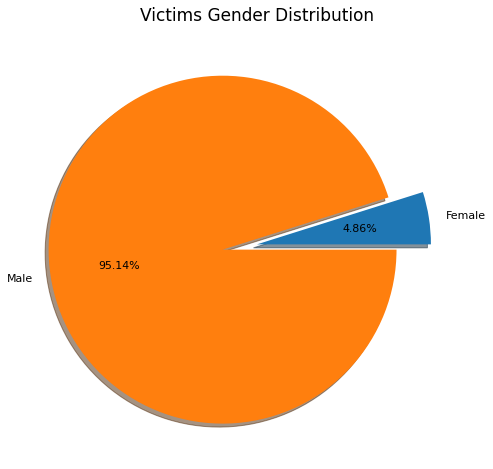

In [ ]:
#gender distribution
df_include_id = df.reset_index()
df_race_pie = df_include_id.groupby('gender')['id'].count()

ax = plt.subplot()

df_race_pie.plot.pie(figsize=(8,8),fontsize=11,autopct='%1.2f%%',explode=[0,0.2],shadow=True)
#ax.pie(df_race_pie,labels=df_race_pie.index,autopct='%1.2f%%',radius=2.5)
plt.title('Victims Gender Distribution',fontsize=17)
plt.ylabel('')
plt.show()

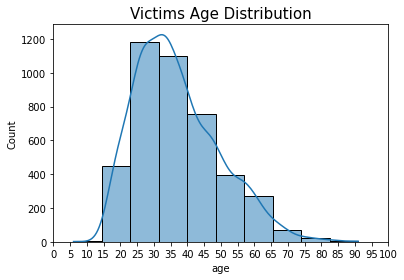

In [ ]:
#Age Distribution_histplot
import seaborn as sns

df_include_id = df.reset_index()
sns.histplot(df_include_id.age,bins=10,kde=True)
plt.xticks((range(0,101,5)))
plt.title('Victims Age Distribution',fontsize=15)

plt.show()

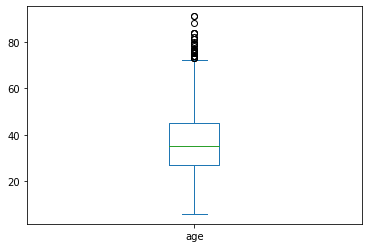

In [ ]:
df_include_id.age.plot.box()